In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})

# Exploratory Data Analysis and Visualization

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Classification/Nepali Movie Review Classificaion/nepalimoviereviews.csv")

In [ ]:
data.sample(10)

,Reviews,Emotion
319,हाम्रो नेपाली फिल्ममा देखिने मुख्य समस्या म यो...,0.0
24,राम्राे छ है कमिडि पनि राेमान्टिक छ,1.0
496,"आम्मामामामामामामा..... पृथक कथावस्तु, गीत सङ्ग...",1.0
400,"कठै! के हावा चलचित्र बनाएका, टुङ-न-पुच्छर",0.0
25,"कलाकारको अभिनय भएन,",0.0
303,कठै बरै करोडौं को लगानी गरेउ होला फिल्म बनाउदा...,0.0
200,"बडो गज्जव रहेछ,यथार्थ घटनामा आधारित कथामा रहेछ...",1.0
299,हैट कथा चाहि एस्तो का बाट आउँछ हो कति राम्रो m...,1.0
87,अती उत्तम चलचित्र हेर्न पाईयो।। धन्यबाद,1.0
84,फिल्म् भनेकाे याे हाे नि त,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  602 non-null    object 
 1   Emotion  602 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


In [ ]:
print(f"There are {data.Emotion.nunique()} types of emotion." )

There are 2 types of emotion.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


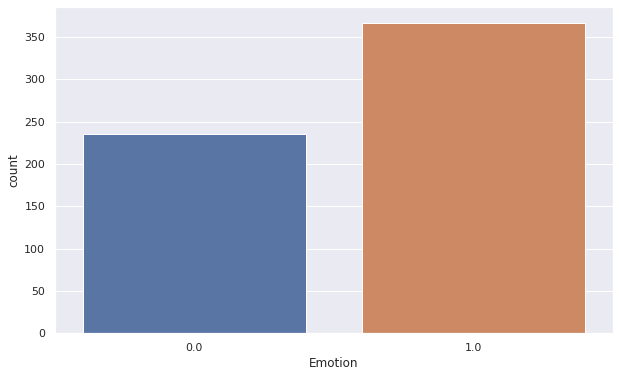

In [ ]:
sns.countplot(data.Emotion)

In [ ]:
data.Emotion.value_counts()

1.0    367
0.0    235
Name: Emotion, dtype: int64

# Text Preprocessing

*   Tokenize the words
*   Remove stopwords
*   stemming or lemmatization



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.words('nepali'))

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

In [ ]:
!!pip install git+https://github.com/sushil79g/Nepali_nlp.git

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting git+https://github.com/sushil79g/Nepali_nlp.git',
 '  Cloning https://github.com/sushil79g/Nepali_nlp.git to /tmp/pip-req-build-lm71pd9n',
 '  Running command git clone -q https://github.com/sushil79g/Nepali_nlp.git /tmp/pip-req-build-lm71pd9n',
 'Collecting gensim==3.7.3',
 '  Downloading gensim-3.7.3-cp37-cp37m-manylinux1_x86_64.whl (24.2 MB)',
 '\x1b[?25l',
 '\x1b[K     |                                | 10 kB 18.3 MB/s eta 0:00:02',
 '\x1b[K     |                                | 20 kB 7.4 MB/s eta 0:00:04',
 '\x1b[K     |                                | 30 kB 10.1 MB/s eta 0:00:03',
 '\x1b[K     |                                | 40 kB 4.8 MB/s eta 0:00:06',
 '\x1b[K     |                                | 51 kB 4.6 MB/s eta 0:00:06',
 '\x1b[K     |                                | 61 kB 5.4 MB/s eta 0:00:05',
 '\x1b[K     |                                | 71 kB 5.4

In [ ]:
from Nepali_nlp import Stem
text = "सरकारका प्रवक्ता प्रदीप ज्ञवालीले पनि गत बिहीबार उनलाई अनशन तोड्न आग्रह गरेका थिए"
Stem().rootify(text)

['सरकार',
 'प्रवक्ता',
 'प्रदीप',
 'ज्ञवाली',
 'पनि',
 'गत',
 'बिहीबार',
 'उन',
 'अनशन',
 'तोड्न',
 'आग्रह',
 'गर',
 '']

In [ ]:
text = ["आग्रह", "गरेका", "थिए"]
Stem().rootify(text)

['आग्रह', 'गर', '']

In [ ]:
!pip install nepalitokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nepalitokenizer import NepaliTokenizer

In [ ]:
tokenize = NepaliTokenizer()
print(tokenize.tokenizer('के छ खबर तिम्रो ? '))

['खबर', 'तिम्रो']


In [ ]:
def text_preprocessing(text):
  # Tokenize the reviews
  text = tokenize.tokenizer(text)
  # Remove the nepali stopwords
  text = [word for word in text if word not in stopwords.words('nepali')]
  # Stemming the nepali words
  text = Stem().rootify(text)
  text = ' '.join(text)
  # Remove the leading and trailing spaces
  text = text.split()
  text = ' '.join(text)
  
  return text

In [ ]:
data.columns

Index(['Reviews', 'Emotion'], dtype='object')

In [ ]:
data.Reviews[0]

'म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे । सामुदायिक विद्यालयमा अध्यापन गराउछु। मलाइ यो चलचित्रले मन नै छोयो । वास्तविक घटना यहि हो कि नेपालका तमाम सामुदायिक विद्यालय यहि समस्या बाट गुज्रीत छन । यस्तै शिक्षा सम्बन्धीको चलचित्र बनोस भनेर अपेक्षा गरेको थिए, आसा पूरा भयो । धन्यवाद सबै लाइ'

In [ ]:
text_preprocessing(data.Reviews[0])

'शिक्षक शिक्षा क्षेत्र रमा मान् सामुदायिक विद्यालय अध्यापन गराउ म चलचित्र मन छो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र बनोस अपेक्षा आसा पूरा धन्यवाद'

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  602 non-null    object 
 1   Emotion  602 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.1+ KB


In [ ]:
data.isna().sum()

Reviews    0
Emotion    0
dtype: int64

# Word Cloud

# Text Vectorization

In [ ]:
X = data["Reviews"].apply(text_preprocessing)
y = data["Emotion"]

In [ ]:
X[0]

'शिक्षक शिक्षा क्षेत्र रमा मान् सामुदायिक विद्यालय अध्यापन गराउ म चलचित्र मन छो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र बनोस अपेक्षा आसा पूरा धन्यवाद'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 10000, ngram_range = (1, 2))

In [ ]:
tfidf_vectorizer = tfidf.fit(X_train)

In [ ]:
print(len(tfidf_vectorizer.vocabulary_))

1811


In [ ]:
X_train = tfidf_vectorizer.transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

# Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
pred = nb_classifier.predict(X_test)

In [ ]:
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy Score : {score}")

Accuracy Score : 0.6942148760330579


In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[11, 33],
       [ 4, 73]])

# Text Classification using LSTM layer

In [ ]:
from collections import Counter
def count_words(text):
  """
  Count unique words
  """
  count = Counter()
  for sentence in text:
    for word in sentence.split():
      count[word] += 1
  return count


In [ ]:
X[1]

'सरकारी स्कूल कलेज पढेर करीब बर्ष बिभिन्न बोडिङ्ग स्कूल पढा शिक्षक सरकारी स्कूल हु फिल्म सन्देशमुलक सबै हेर्नुहोला'

In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
X[100]

'फिल्म सारै मन पराे फिल्म हेरन पाईयाेस्'

In [ ]:
counter = count_words(X)

In [ ]:
counter

Counter({'शिक्षक': 2,
         'शिक्षा': 7,
         'क्षेत्र': 3,
         'रमा': 1,
         'मान्': 13,
         'सामुदायिक': 3,
         'विद्यालय': 3,
         'अध्यापन': 1,
         'गराउ': 1,
         'म': 8,
         'चलचित्र': 78,
         'मन': 92,
         'छो': 19,
         'वास्तविक': 9,
         'घटना': 4,
         'यहि': 6,
         'नेपाल': 20,
         'तमाम': 1,
         'समस्या': 4,
         'गुज्रीत': 1,
         'सम्बन्धी': 3,
         'बनोस': 1,
         'अपेक्षा': 2,
         'आसा': 1,
         'पूरा': 6,
         'धन्यवाद': 11,
         'सरकारी': 4,
         'स्कूल': 3,
         'कलेज': 1,
         'पढेर': 3,
         'करीब': 1,
         'बर्ष': 1,
         'बिभिन्न': 1,
         'बोडिङ्ग': 1,
         'पढा': 1,
         'हु': 13,
         'फिल्म': 353,
         'सन्देशमुलक': 4,
         'सबै': 4,
         'हेर्नुहोला': 1,
         'शिव': 1,
         'मन्दिर': 1,
         'देख्न': 2,
         'पा': 18,
         'ठाउ': 2,
         'सम्पुर्ण': 4,
         'टिम': 1

In [ ]:
print(f"There are {len(counter)} unique words in the corpus")

There are 1976 unique words in the corpus


In [ ]:
num_words = len(counter)
# max number of words in a sequence
max_length = 12

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
X_train.iloc[0]

'नेपालि सामान्य स्टेज कलाकार वास्तविक मानचित्र बोक चलचित्र मन छो उत्कृस्ट चलचित्र'

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
word_index

{'फिल्म': 1,
 'नेपाली': 2,
 'मन': 3,
 'फिलिम': 4,
 'चलचित्र': 5,
 'लाग्': 6,
 'कथा': 7,
 'बनाउ': 8,
 'हेर्': 9,
 'हेर्न': 10,
 'हेर': 11,
 'ब': 12,
 'बना': 13,
 'कलाकार': 14,
 'मुभी': 15,
 'रै': 16,
 'अभिनय': 17,
 'हिरो': 18,
 'यार': 19,
 'गर': 20,
 'अति': 21,
 'छो': 22,
 'सारै': 23,
 'नेपाल': 24,
 'हेरेर': 25,
 'छि': 26,
 'माया': 27,
 'झुर': 28,
 'उत्कृष्ट': 29,
 'टिम': 30,
 'एकद': 31,
 'पा': 32,
 'फ्लिम': 33,
 'हु': 34,
 'एस्तो': 35,
 'नया': 36,
 'हेरे': 37,
 'नाम': 38,
 'समाज': 39,
 'है': 40,
 'बनाउन': 41,
 'यथार्थ': 42,
 'आधारित': 43,
 'मुबि': 44,
 'बस्तु': 45,
 'छ्या': 46,
 'लागेन': 47,
 'पर': 48,
 'भन्': 49,
 'जति': 50,
 'नेपालि': 51,
 'वास्तविक': 52,
 'चाहिँ': 53,
 'राम्रै': 54,
 'कहानी': 55,
 'बधाई': 56,
 'सन्देश': 57,
 'भय': 58,
 'शुभकामना': 59,
 'हल': 60,
 'भ': 61,
 'पात्र': 62,
 'रमाइलो': 63,
 'परेन': 64,
 'इतिहास': 65,
 'आ': 66,
 'मज्जा': 67,
 'हजुर': 68,
 'दामि': 69,
 'मार्मिक': 70,
 'स्टोरी': 71,
 'कुरा': 72,
 'यस्ता': 73,
 'चै': 74,
 'दामी': 75,
 'कहि': 76,
 'मोभी': 77,


In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

[51, 257, 481, 14, 52, 482, 86, 5, 3, 22, 258, 5]

In [ ]:
from keras_preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = 'post', truncating = 'post')

In [ ]:
train_padded[0]

array([ 51, 257, 481,  14,  52, 482,  86,   5,   3,  22, 258,   5],
      dtype=int32)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = "post", truncating = "post")

In [ ]:
print(X_train.iloc[0])
print(train_sequences[0])

नेपालि सामान्य स्टेज कलाकार वास्तविक मानचित्र बोक चलचित्र मन छो उत्कृस्ट चलचित्र
[51, 257, 481, 14, 52, 482, 86, 5, 3, 22, 258, 5]


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
def decode(text):
  return " ".join([reverse_word_index.get(i, "?") for i in  text])

In [ ]:
decode(train_sequences[0])

'नेपालि सामान्य स्टेज कलाकार वास्तविक मानचित्र बोक चलचित्र मन छो उत्कृस्ट चलचित्र'

In [ ]:
print(f"Spape of train {train_padded.shape}")
print(f"Spape of test {test_padded.shape}")

Spape of train (451, 12)
Spape of test (151, 12)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(num_words, 64, input_length = max_length),
    LSTM(32, dropout = 0.2),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 12, 64)            126464    
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 138,913
Trainable params: 138,913
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(train_padded)

451

In [ ]:
len(y_train)

451

In [ ]:
history = model.fit(train_padded, y_train, epochs = 30, batch_size = 64, validation_data = (test_padded, y_test))

Epoch 1/30
8/8 [==============================] - 4s 95ms/step - loss: 0.6862 - accuracy: 0.5987 - val_loss: 0.6763 - val_accuracy: 0.6093
Epoch 2/30
8/8 [==============================] - 0s 15ms/step - loss: 0.6687 - accuracy: 0.6098 - val_loss: 0.6692 - val_accuracy: 0.6093
Epoch 3/30
8/8 [==============================] - 0s 18ms/step - loss: 0.6563 - accuracy: 0.6098 - val_loss: 0.6659 - val_accuracy: 0.6093
Epoch 4/30
8/8 [==============================] - 0s 15ms/step - loss: 0.6402 - accuracy: 0.6120 - val_loss: 0.6620 - val_accuracy: 0.6093
Epoch 5/30
8/8 [==============================] - 0s 18ms/step - loss: 0.6037 - accuracy: 0.6319 - val_loss: 0.6411 - val_accuracy: 0.6225
Epoch 6/30
8/8 [==============================] - 0s 16ms/step - loss: 0.5007 - accuracy: 0.7140 - val_loss: 0.5446 - val_accuracy: 0.6556
Epoch 7/30
8/8 [==============================] - 0s 16ms/step - loss: 0.3093 - accuracy: 0.9069 - val_loss: 0.4395 - val_accuracy: 0.8278
Epoch 8/30
8/8 [===========

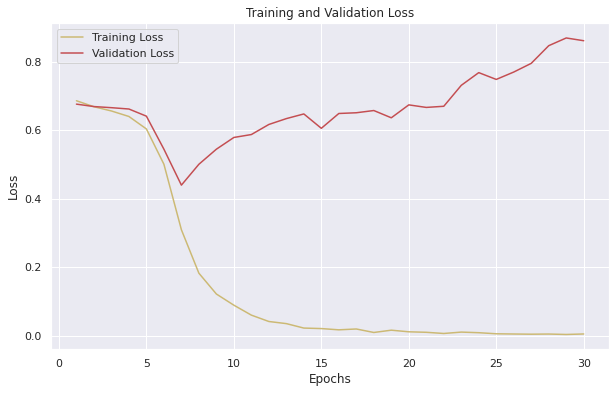

In [ ]:
#plot the training and validation accuracy and losss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

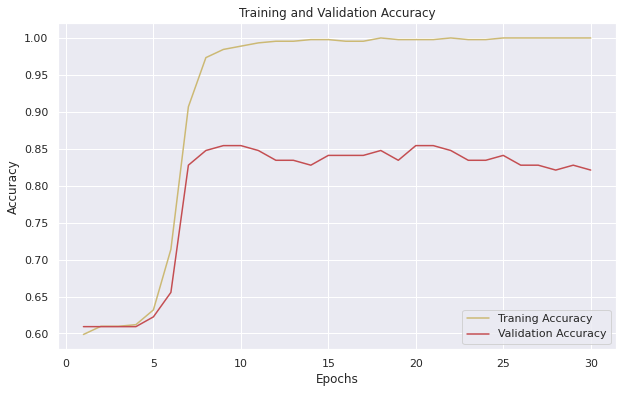

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = "Traning Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
len(y_test)

151

In [ ]:
sum(y_test)

92.0

5/5 [==============================] - 0s 5ms/step


[Text(66.5, 0.5, 'True'), Text(0.5, 30.5, 'Predicted')]

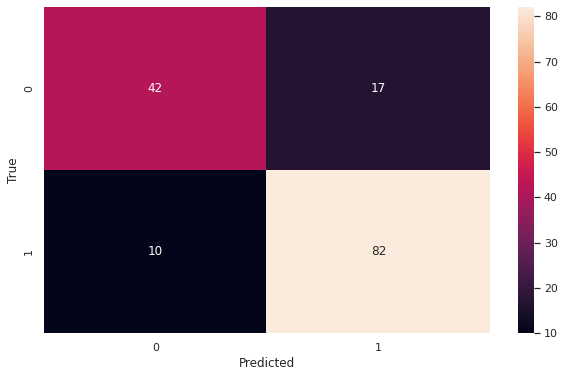

In [ ]:
from sklearn.metrics import confusion_matrix

# Predicting the test set results
y_pred = model.predict(test_padded)
y_pred = (y_pred > 0.5)

# Confusion Matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

cm_heatmap = sns.heatmap(cm, annot = True)
cm_heatmap.set(xlabel = "Predicted", ylabel = "True")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_pred, target_names = ['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.81      0.71      0.76        59
    Positive       0.83      0.89      0.86        92

    accuracy                           0.82       151
   macro avg       0.82      0.80      0.81       151
weighted avg       0.82      0.82      0.82       151



In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/NLP/Classification/Nepali Movie Review Classificaion/reviewV1.h5")